# Data Analysis
Dans cette analyse nous allons faire des trucs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
data_df = pd.read_csv("data/styles.csv")
data_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

       year   usage                             productDisplayName  
0 2,011.000  Casual               Turtle Check Men Navy Blue Shirt  
1 2,012.000  Casual             Peter England Men Party Blue Jeans  
2 2,016.000  Casual                       Titan Women Silver Watch  
3 2,011.000  Casual  Manchester United Men Solid Black Track Pants  
4 2,012.000  Casual                          Puma Men Grey T-shirt

Display the number of item in the dataset

In [3]:
print(f"The dataset contains {data_df.shape[0]} items")

The dataset contains 44446 items


Display some statistics about the dataset

In [4]:
stats = data_df[["articleType", "baseColour", "season"]].describe()
mode = data_df[["articleType", "baseColour", "season"]].mode()
stats = stats.append(mode)
stats.rename(index={0: "mode"})

/tmp/ipykernel_21950/535057795.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats = stats.append(mode)


articleType baseColour  season
count        44446      44431   44425
unique         143         46       4
top        Tshirts      Black  Summer
freq          7070       9732   21476
mode       Tshirts      Black  Summer

Display some graphics

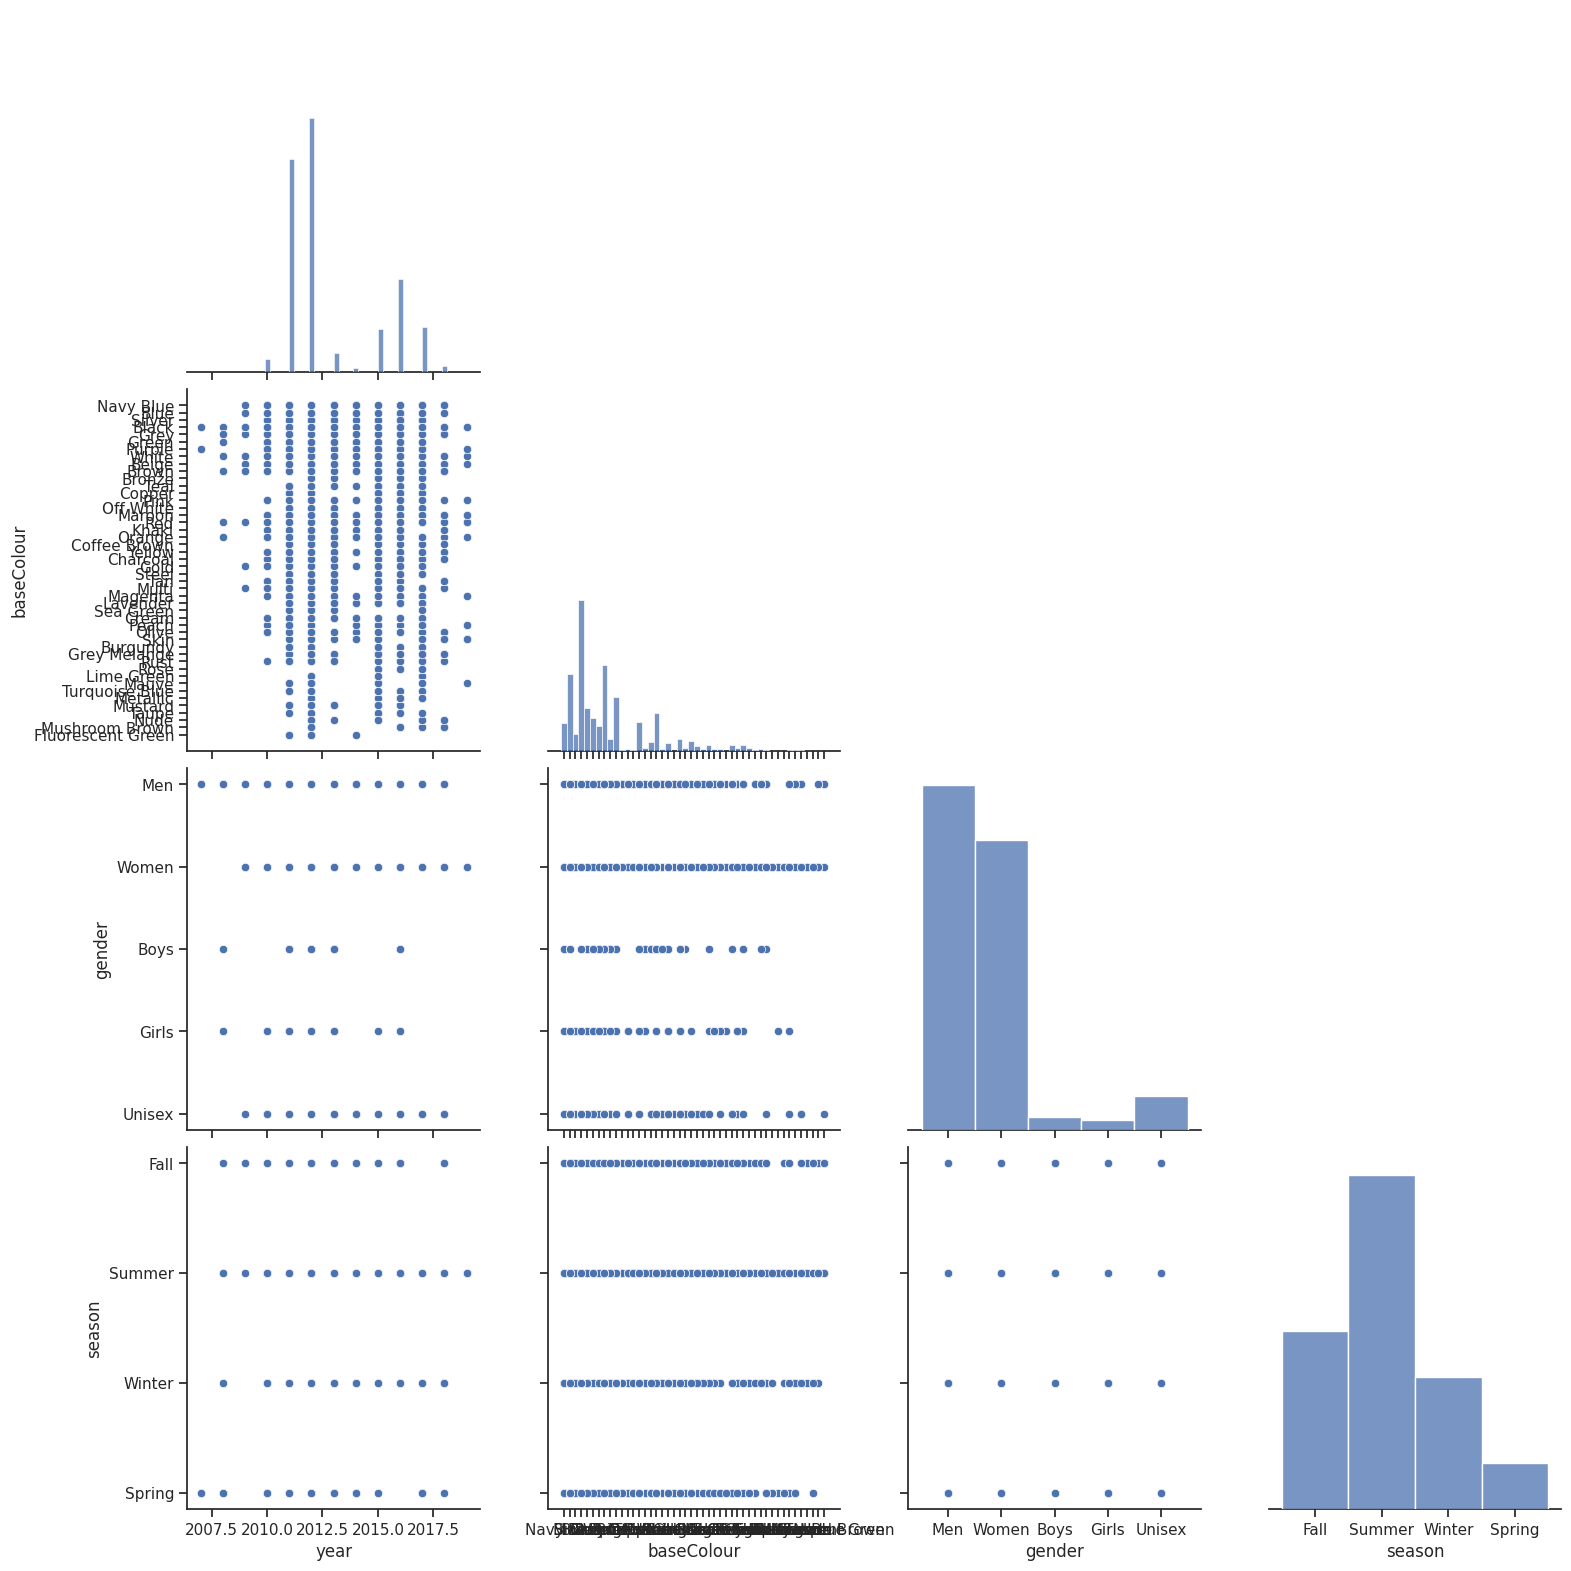

In [30]:
sns.pairplot(data = data_df, vars=["year","baseColour","gender","season"], height=4, corner=True);

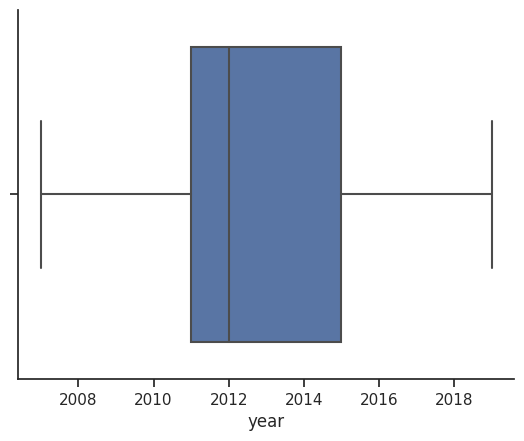

In [33]:
sns.boxplot(data=data_df, x="year")
sns.despine();

What is the most frequent article type

In [34]:
def count_genre_freq(df, column, delimiter=", "):
    from collections import Counter
    non_empty_rows = df[df[column].isnull() == False][column]
    row_counted = non_empty_rows.str.split(delimiter).apply(Counter)
    total_freq = dict(sum(row_counted, Counter()))
    freq_series = pd.Series(total_freq)
    output = freq_series.sort_values(ascending=False)
    return output

In [35]:
data_per_article_type = count_genre_freq(data_df, "articleType")
data_per_article_type

Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Length: 143, dtype: int64

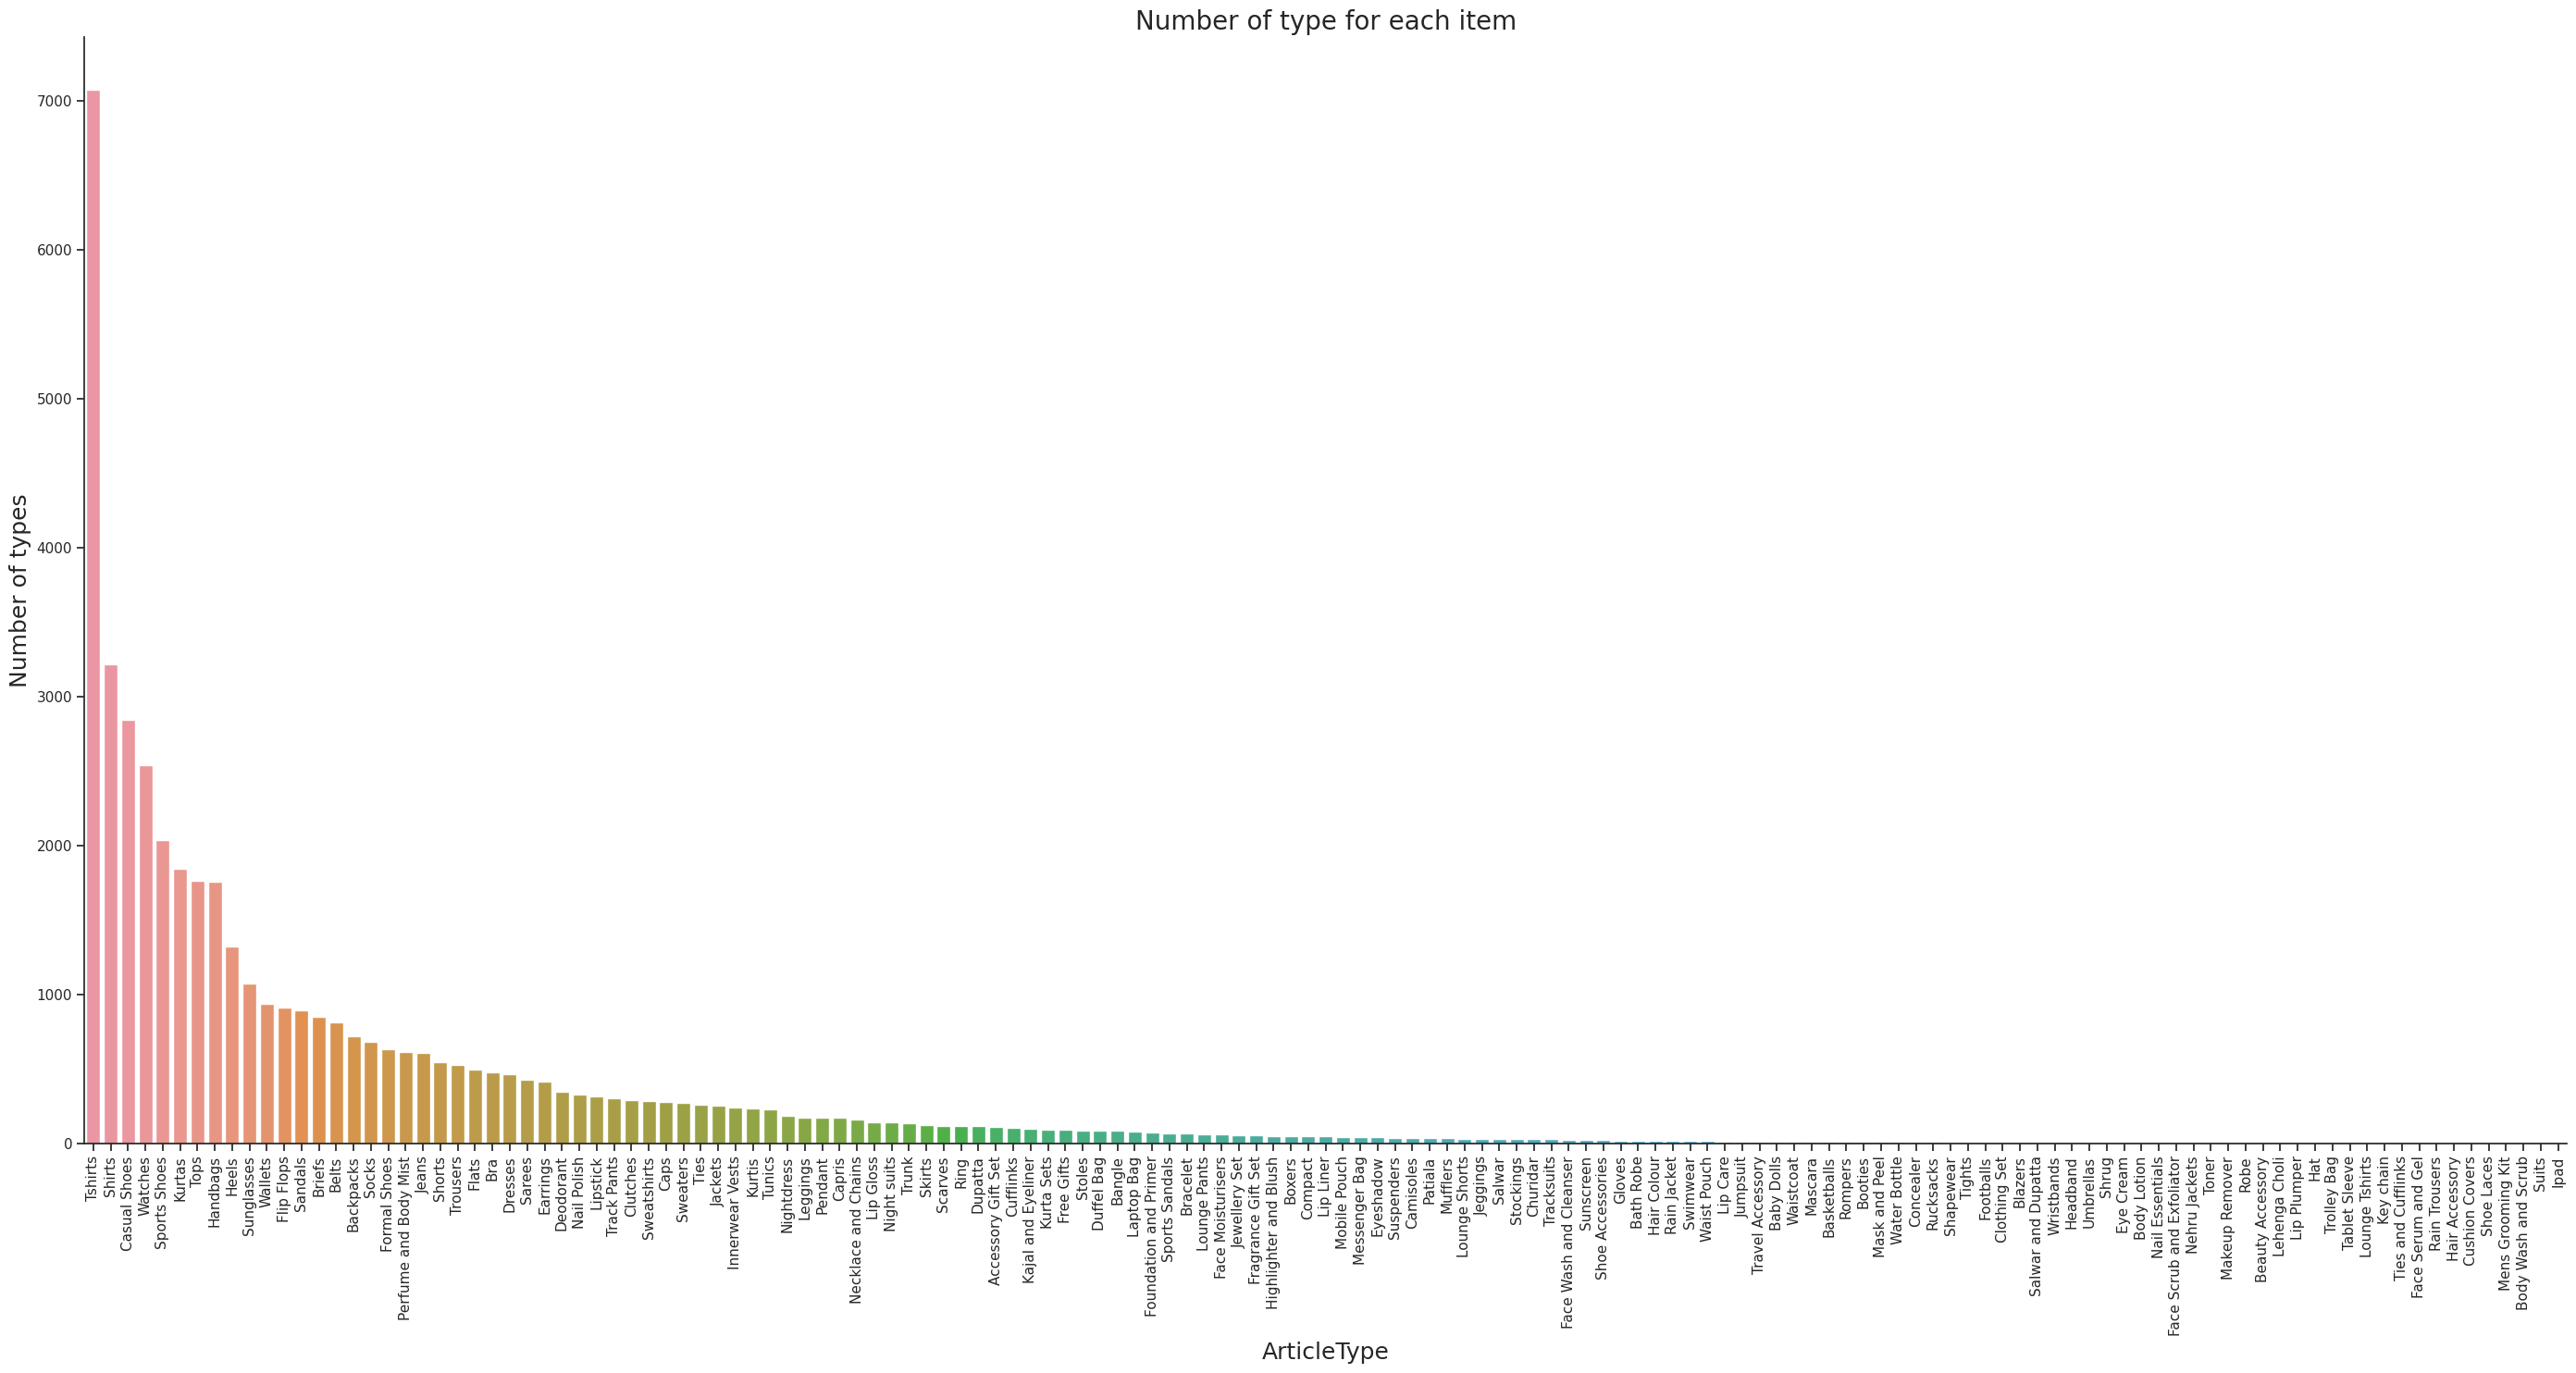

In [58]:
plt.figure(figsize=(28,15))
sns.barplot(x=data_per_article_type.index, y=data_per_article_type.values)
plt.xlabel("ArticleType", size=18)
plt.ylabel("Number of types", size=18)
plt.xticks(rotation=90)
plt.title("Number of type for each item", size=20)
plt.tight_layout()
sns.despine();